## Importing Libraries

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing Data

In [279]:
# Import listings.csv and load it as pandas dataframe
listings_data = pd.read_csv('..\Data\listings.csv')

# Import reviews.csv and load it as pandas dataframe
reviews_data = pd.read_csv('..\Data\reviews.csv')

In [280]:
# Convert the dataframe to a readable float format
pd.set_option('float_format', '{:f}'.format)

## Understanding the Listings data

In [281]:
# Print out the head of the listings data
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20200509110721,2020-05-11,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,none,"It is very close to everything and everywhere,...",...,f,f,moderate,f,f,1,0,1,0,1.540000
1,12351,https://www.airbnb.com/rooms/12351,20200509110721,2020-05-10,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,none,"Pyrmont is an inner-city village of Sydney, on...",...,f,f,strict_14_with_grace_period,t,t,2,0,2,0,4.410000
2,14250,https://www.airbnb.com/rooms/14250,20200509110721,2020-05-11,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",none,Balgowlah Heights is one of the most prestigio...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.040000
3,15253,https://www.airbnb.com/rooms/15253,20200509110721,2020-05-11,Unique Designer Rooftop Apartment in City Loca...,Penthouse living at it best ... You will be st...,"A charming two-level, two-bedroom, two-bathroo...",Penthouse living at it best ... You will be st...,none,The location is really central and there is nu...,...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,3.640000
4,44545,https://www.airbnb.com/rooms/44545,20200509110721,2020-05-12,Sunny Darlinghurst Warehouse Apartment,Sunny warehouse/loft apartment in the heart of...,"My apartment is a beautiful, simple, open plan...",Sunny warehouse/loft apartment in the heart of...,none,Darlinghurst is home to some of Sydney's best ...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,0.650000


In [282]:
# List out the columns in the listings Data
list(listings_data.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## Data Preperation

In [283]:
# Extract only the useful columns for our analysis
listings = listings_data[['id','neighbourhood', 'neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','price','host_since','guests_included','minimum_nights','number_of_reviews','review_scores_rating','instant_bookable','cancellation_policy']]

In [284]:
# Print out the new head of the listings data
listings.head()

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,host_since,guests_included,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,11156,Elizabeth Bay/Rushcutters Bay,Sydney,-33.869170,151.226560,Apartment,Private room,1,$64.00,2009-09-23,1,2,196,92.000000,f,moderate
1,12351,Pyrmont,Sydney,-33.865150,151.191900,Townhouse,Private room,2,"$14,315.00",2009-05-14,2,2,526,95.000000,f,strict_14_with_grace_period
2,14250,Balgowlah,Manly,-33.800930,151.261720,House,Entire home/apt,6,$470.00,2009-11-20,6,5,2,90.000000,f,strict_14_with_grace_period
3,15253,Darlinghurst,Sydney,-33.879640,151.216800,Apartment,Private room,2,$100.00,2009-12-03,1,2,364,88.000000,t,strict_14_with_grace_period
4,44545,Surry Hills,Sydney,-33.878880,151.214390,Loft,Entire home/apt,2,$131.00,2010-04-22,1,3,76,97.000000,f,strict_14_with_grace_period


In [285]:
listings.dtypes

id                          int64
neighbourhood              object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
price                      object
host_since                 object
guests_included             int64
minimum_nights              int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
cancellation_policy        object
dtype: object

In [286]:
# Using regex to remove unwanted characters and convet into float
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)

In [287]:
# Convert columns into their proper formats (date-time)
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [288]:
# Group the data by the column 'host_since'
result = listings.groupby(listings['host_since'].map(lambda x: x.year)).id.count()
year = pd.DataFrame(result)

In [289]:
# rename the 'id' column to listings
year.rename(columns={'id':'listings'}, inplace=True)
year = pd.DataFrame(year).reset_index()

In [290]:
# Create a column with cummulative sum of the listings by year
year['total listings']= year['listings'].cumsum(axis=0)

In [291]:
# Convert the data type of the column 'host_since' to int
year['host_since'] = year['host_since'].astype(int)

In [292]:
# Remnaming the column 'Host_Since' to 'year'
year.rename(columns={'host_since':'year'}, inplace=True)

## Plots

### Airbnb listings over time

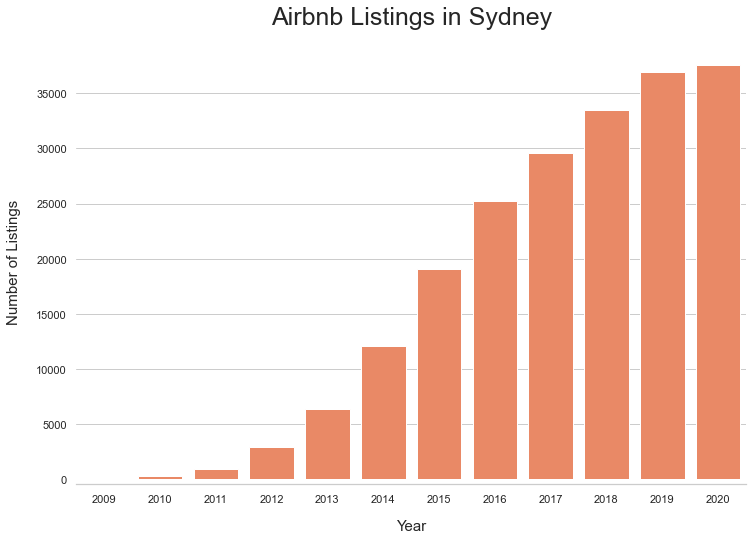

In [293]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# Barplot for 'year' and 'total_listings'
ax = sns.barplot(x="year", y="total listings", data=year, color='Coral')
# Title
ax.set_title('Airbnb Listings in Sydney',fontsize=25,pad=20)
# X and Y lables
ax.set_xlabel('Year',fontsize=15, labelpad=15)
ax.set_ylabel('Number of Listings',fontsize=15, labelpad=15) 
sns.despine(offset=5, left=True)

### New Airbnb listings over time

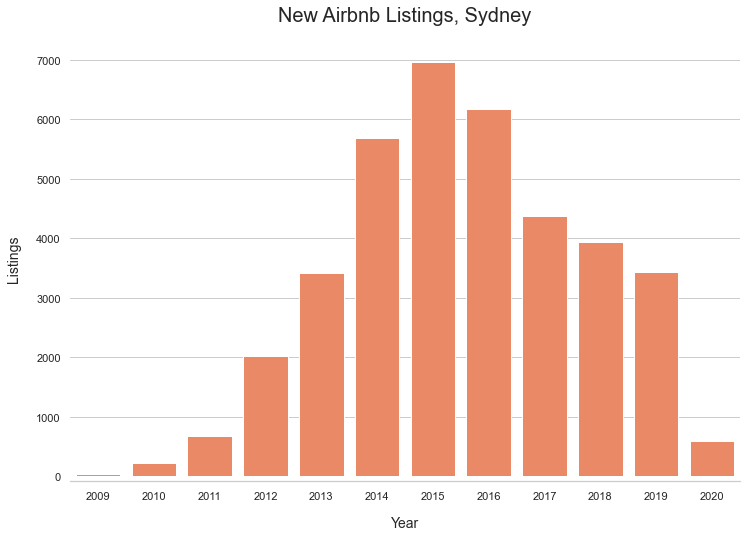

In [294]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# Barplot for 'year' and 'listings'
ax = sns.barplot(x='year', y="listings", data=year, color="coral")
# Title
ax.set_title('New Airbnb Listings, Sydney',fontsize=20,pad=20)
# X and Y lables
ax.set_xlabel('Year',fontsize=14, labelpad=15)
ax.set_ylabel('Listings',fontsize=14, labelpad=15)
sns.despine(offset=5, left=True)

### The types of room listings

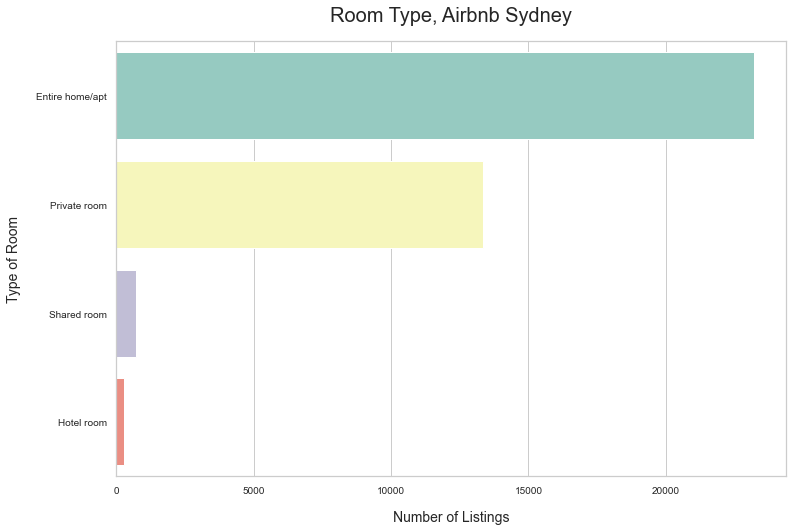

In [295]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# Title
ax.axes.set_title("Room Type, Airbnb Sydney",fontsize=20, pad=20)
# Countplot for 'room_type' and their count
ax = sns.countplot(y='room_type',data=listings,order=listings['room_type'].value_counts().index, palette="Set3")
# X and Y Lables
ax.set_xlabel('Number of Listings',fontsize=14,labelpad=15)
ax.set_ylabel('Type of Room',fontsize=14,labelpad=15)
# changing tick size
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

### Top neighbourhoods listed

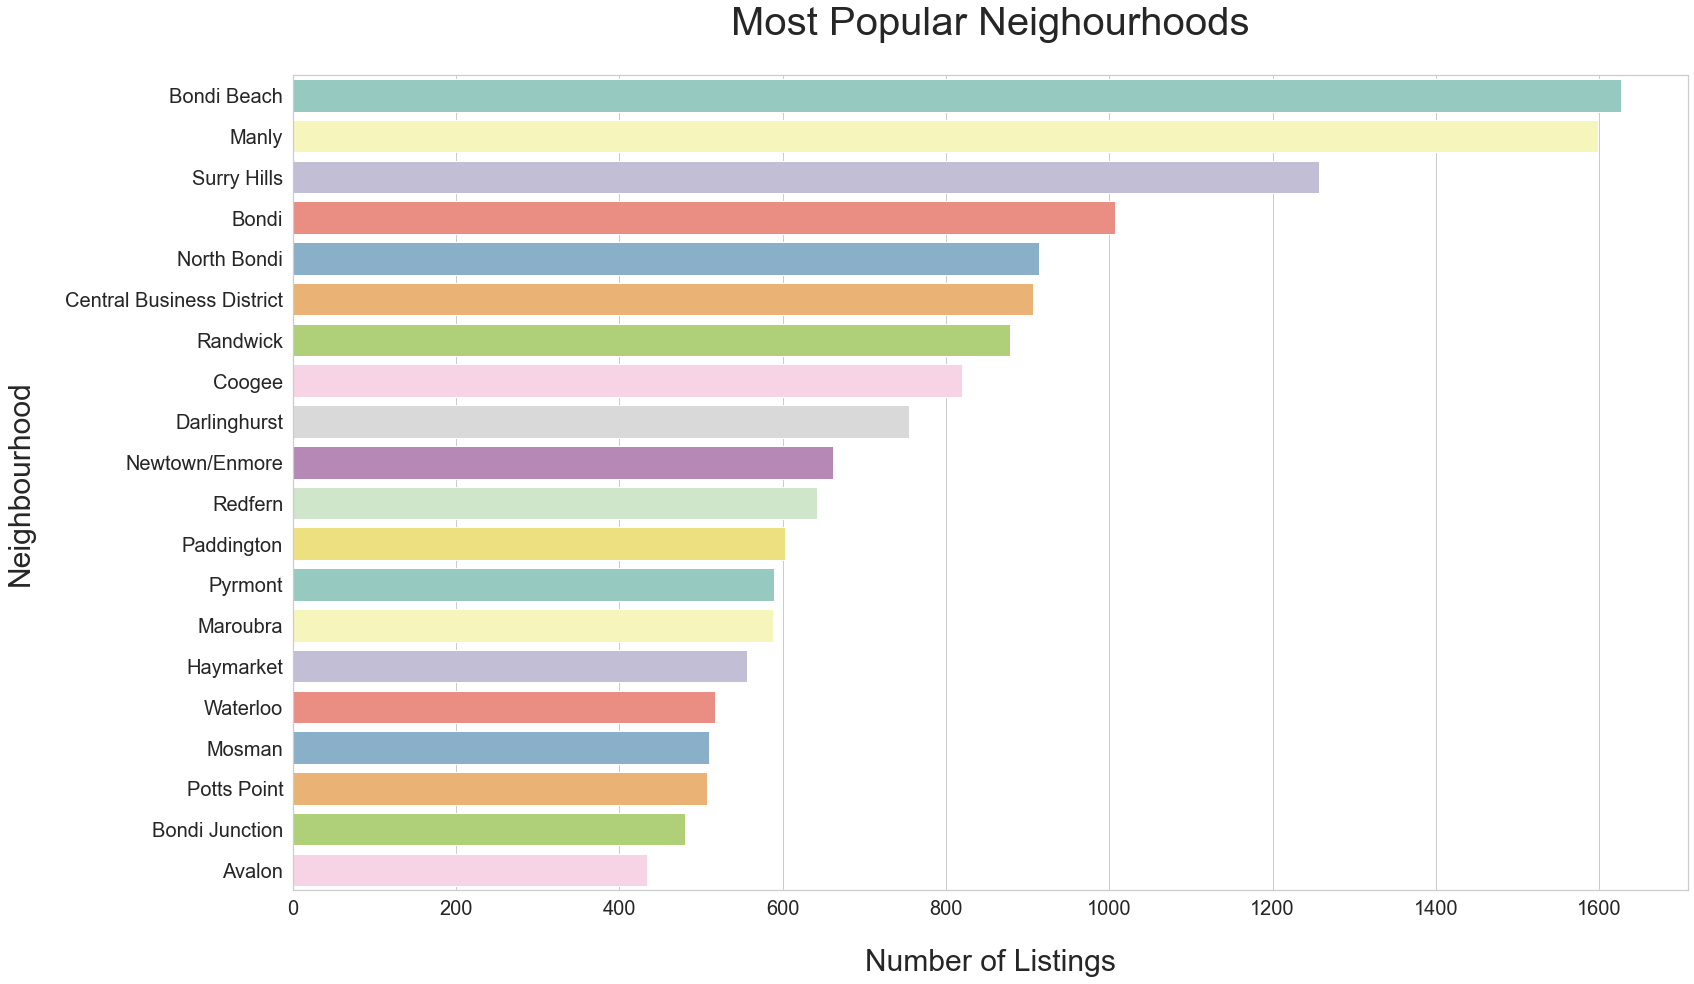

In [296]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
# Title
ax.axes.set_title("Most Popular Neighourhoods",fontsize=40,pad=40)
# Countplot for 'neighbourhood' and their count
ax = sns.countplot(y='neighbourhood',data=listings, order = listings['neighbourhood'].value_counts().iloc[:20].index, palette="Set3")
# X and Y labels
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
# Changing tick size
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [297]:
# list of top neighbourhood listings
top = listings['neighbourhood'].value_counts().iloc[:20].index.tolist()

In [298]:
# Create a dataframe to group neighbourhoods by average room price
price = pd.DataFrame(listings.groupby(['neighbourhood']).price.mean().reset_index())

# Create a dataframe to filter top 20 neighbourhoods
top_price = price[price['neighbourhood'].isin(top)].sort_values('price',ascending=False)

### Prices of top listings in top neighbourhoods

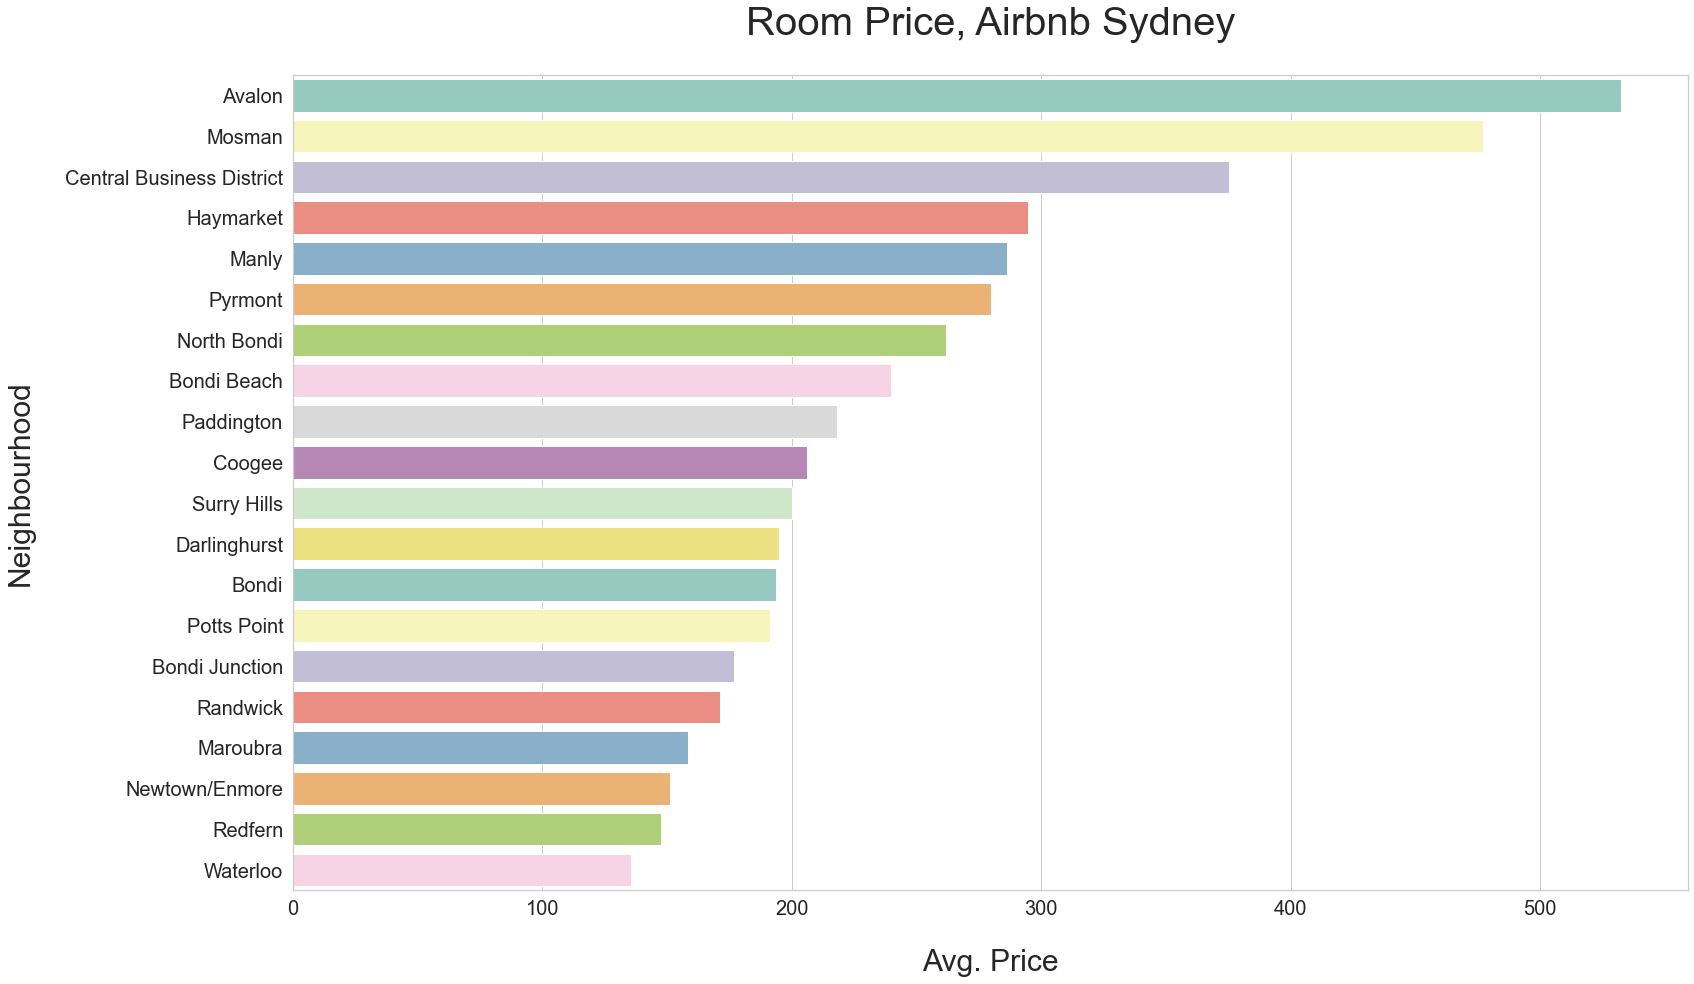

In [299]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
# Title
ax.axes.set_title("Room Price, Airbnb Sydney",fontsize=40, pad=40)
# Barplot of 'Price' and 'neighbourhood'
ax = sns.barplot(x='price', y='neighbourhood',data=top_price, palette='Set3')
# X and Y labels
ax.set_xlabel('Avg. Price',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
# Changing tick size
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

### Ratings of the listings

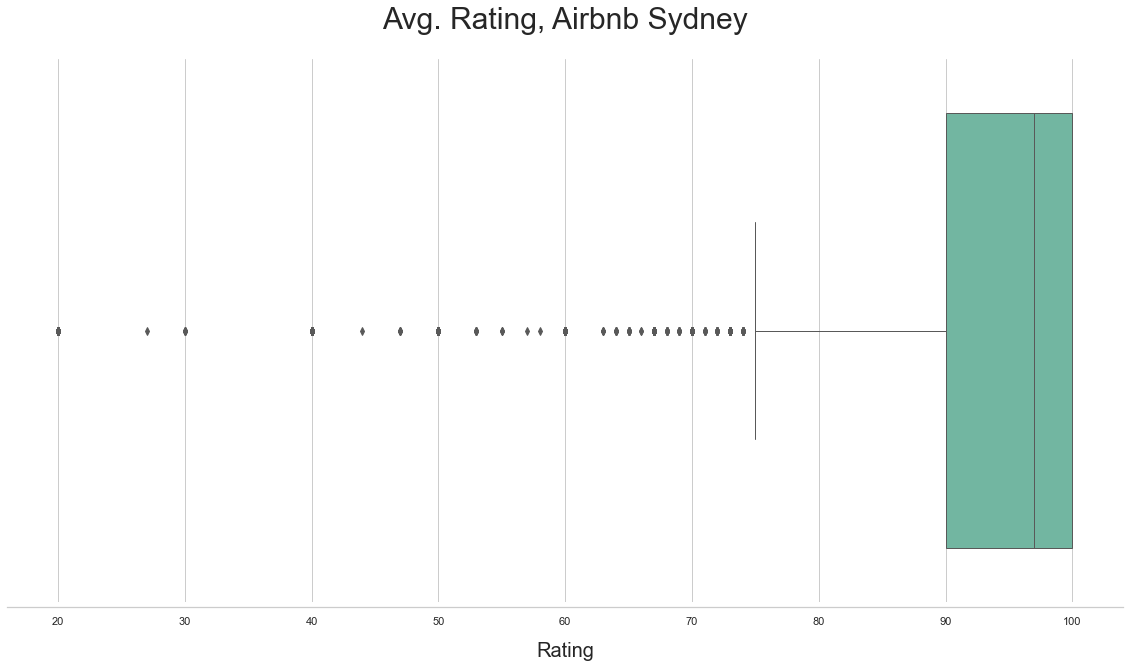

In [300]:
fig, ax = plt.subplots(figsize=(20,10))
# Boxplot of the ratings for the listings 
ax = sns.boxplot(x=listings["review_scores_rating"], linewidth=1, palette='Set2')
# Title
ax.set_title('Avg. Rating, Airbnb Sydney',fontsize=30,pad=30)
# X label
ax.set_xlabel('Rating',fontsize=20, labelpad=15)

sns.despine(offset=5, left=True)

## Understanding the Rerviews Data

In [301]:
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11156,19220,2009-12-05,52946,Jeff,Colleen was friendly and very helpful regardin...
1,11156,32592,2010-03-31,99382,Michael,"Great place, centrally located, easy walk to t..."
2,11156,42280,2010-05-14,105797,Marina,Colleen is very friendly and helpful. The apar...
3,11156,140942,2010-11-17,259213,Sigrid,Dear Colleen!\r\nMy friend Diemut from Germany...
4,11156,151966,2010-12-11,273389,Eduardo,"Lovely, interesting chats and very helpful giv..."


In [302]:
list(reviews_data.columns)

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

### Data Preperation

In [303]:
# Rename column from date to review_date in the reviews data
reviews_data.rename(columns={'date':'review_date'}, inplace=True)

In [304]:
# Conver the review_date data type to data-time
reviews_data['review_date'] = pd.to_datetime(reviews_data['review_date'])

In [305]:
# Create new columns from existing ones
reviews_data['month_year'] = reviews_data.review_date.dt.to_period('M')
reviews_data['year'] = reviews_data.review_date.apply(lambda x: x.year)
reviews_data['month'] = reviews_data.review_date.apply(lambda x: x.month)

In [306]:
# Group reviews data by year
reviews_year = pd.DataFrame(reviews_data.groupby(['year']).review_date.count().reset_index())

In [307]:
# Renaming column
reviews_year.rename(columns={'review_date':'reviews'}, inplace=True)

In [308]:
# Create new column 'bookings' by estimation.
reviews_year['bookings'] = reviews_year['reviews']*2

### Bookings per year

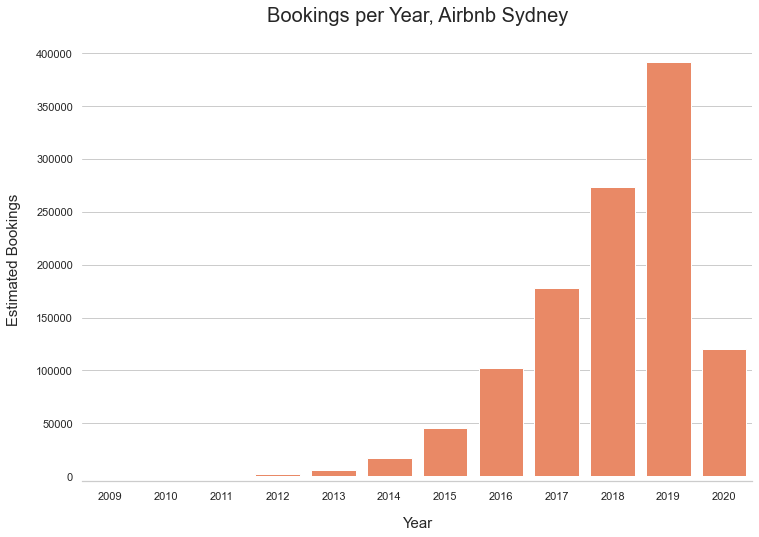

In [309]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# Barplot for 'year' and 'bookings'
ax = sns.barplot(x="year", y="bookings", data=reviews_year, color='Coral')
# Title
ax.set_title('Bookings per Year, Airbnb Sydney',fontsize=20,pad=20) # Give the plot a main title
# X and Y labels
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Estimated Bookings',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

In [310]:
# Merge reviews per year and listings per year
demand = year.merge(reviews_year, on='year')

In [311]:
# Create new columns for booked nights and available nights
demand['booked nights'] = demand['bookings']*2
demand['available nights'] = demand['total listings']*365

In [312]:
# Create new feature occupancy rate, booked nights divided by available nights
demand['occupancy rate'] = demand['booked nights']/demand['available nights']*100

### Occupancy Rate

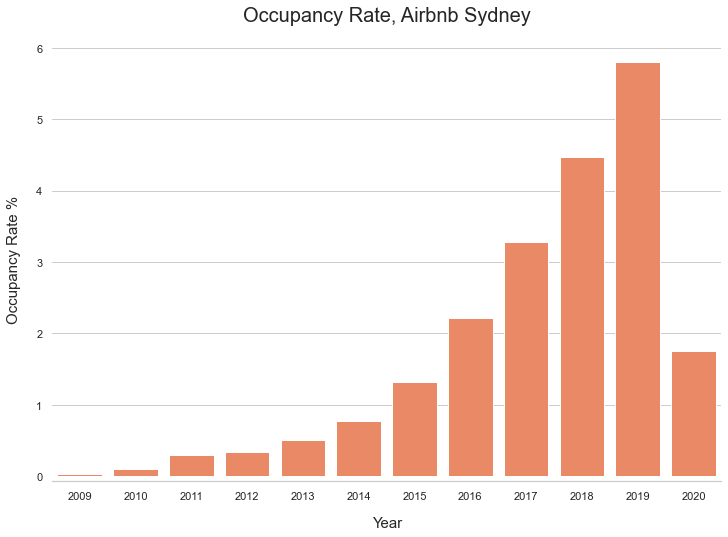

In [313]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# Barplot for occupancy Rate and year
ax = sns.barplot(x="year", y="occupancy rate", data=demand, color='Coral')\
# Title
ax.set_title('Occupancy Rate, Airbnb Sydney',fontsize=20,pad=20)
# X and Y Label
ax.set_xlabel('Year',fontsize=15, labelpad=15)
ax.set_ylabel('Occupancy Rate %',fontsize=15, labelpad=15) 
sns.despine(offset=5, left=True)